In [ ]:
# importing modules
import numpy as np
import pandas as pd
import seaborn as sns
import scipy as sp
import matplotlib.pyplot as plt

from scipy import stats
from scipy import optimize
from scipy.optimize import curve_fit
from scipy import fftpack
from scipy.integrate import cumulative_trapezoid

In [ ]:
C = 2.14*10**(-6) #F
L = 4.3*10**(-3) #H
R = 109.5 #Ohm
Rcoil = 9.4 #Ohm (cheating)
Rtot = R+Rcoil
Vamp = 0.43 #Volt

In [ ]:
RLC = pd.read_csv('https://raw.githubusercontent.com/anasroumeih/Lab2/main/E11e%20-%20RLC.csv')
RC = pd.read_csv('https://raw.githubusercontent.com/anasroumeih/Lab2/main/E11e%20-%20RL.csv')
RL = pd.read_csv('https://raw.githubusercontent.com/anasroumeih/Lab2/main/E11e%20-%20RC.csv')

In [ ]:
RL.head()

,Frequency (Hz),Timeshift (micros)
0,55.0,4250.0
1,71.0,3240.0
2,92.0,2500.0
3,127.0,1700.0
4,193.0,1090.0


In [ ]:
#Creating arrays
RLC_f = np.array(RLC['Frequency (Hz)'])
RLC_t = np.array(RLC['Timeshift (micros)'])*(-1)

RC_f = np.array(RC['Frequency (Hz)'])
RC_t = -np.array(RC['Timeshift (micros)'])*(-1)

RL_f = np.array(RL['Frequency (Hz)'])
RL_t = np.array(RL['Timeshift (micros)'])*(-1)

In [ ]:
#Obtaining phase shifts

RLC_shift = 2*np.pi*RLC_f*RLC_t*10**(-6)
RC_shift = 2*np.pi*RC_f*RC_t*10**(-6)
RL_shift = 2*np.pi*RL_f*RL_t*10**(-6)

#Task a

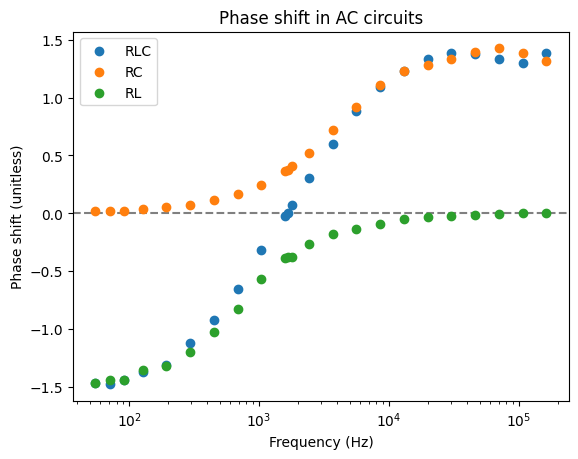

In [ ]:
plt.scatter(RLC_f,RLC_shift, label = 'RLC')
plt.scatter(RC_f,RC_shift, label = 'RC')
plt.scatter(RL_f,RL_shift, label = 'RL')
plt.xscale('log')
plt.title('Phase shift in AC circuits')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Phase shift (unitless)')
#plt.axhline(-np.pi/2, ls = '--', zorder = -1)
plt.axhline(0, ls = '--', zorder = -1, color = 'gray')
plt.legend()
plt.savefig('task2a.png')

#Task d

In [ ]:
def fit(f,r):
  return np.arctan((((2*np.pi*f)**2) * L - 1/C)/(2*np.pi*f*r))

In [ ]:
popt, pcov = curve_fit(fit, RLC_f, RLC_shift, p0 = [100] )
R_fit = popt[0]
popt, np.sqrt(pcov[0][0])

(array([118.82767142]), 6.625026996724715)

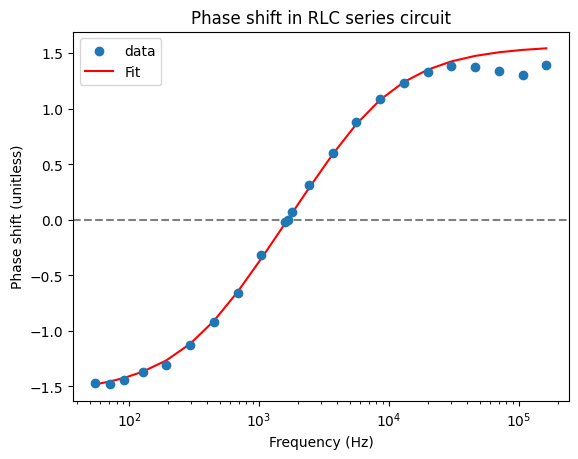

In [ ]:
plt.scatter(RLC_f,RLC_shift, label = 'data', zorder = 10)
plt.plot(RLC_f,fit(RLC_f,R_fit), label = 'Fit', c = 'r')
plt.xscale('log')
plt.axhline(0, ls = '--', zorder = -1, color = 'gray')
plt.title('Phase shift in RLC series circuit')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Phase shift (unitless)')
plt.legend()
plt.savefig('task2d.png')

#Task c


In [ ]:
#RF
#The frequency at which the phase shift becomes 0 is found from the data

In [ ]:
min_index = np.where(RLC_shift == 0)[0][0]
RLC_f[min_index]


1659

In [ ]:
l = 1/(4*np.pi**2*RLC_f[min_index]**2*C)
l

0.004300646218211324

So the resonance frequency is $1659 Hz$

 (\usepackage{siunitx}) $$ f_r = \SI{1659}{\Hz}$$
Using the equation  $ L = \frac{1}{4\pi^2f_r^2C}$
With $C= \SI{2.14\cdot10^{-6}}{\F}$ We get $L=\SI{4.3 \cdot 10^{-3}}{H}$.

In [ ]:
# by fitting on the RL series phase shift
def fitc(f, L, k):
  return np.arctan((2*np.pi*f * L)/(Rtot)) + k*np.pi
  #return np.arctan((-((2*np.pi*f)**2) * L)/(2*np.pi*f*r))

In [ ]:
def tan_phase(f, L):
  return np.tan(-(2*np.pi*f * L )/(Rtot))

In [ ]:
poptm, pcovm = curve_fit(tan_phase, RL_f, np.tan(RL_shift), p0 = [0.0043])
poptm, np.sqrt(pcovm[0][0])

(array([0.00426706]), 8.812751251090549e-05)

In [ ]:
a = np.linspace(50,160000,1000)

In [ ]:
fitc_phase = np.arctan((-2*np.pi*a * poptm[0] )/(Rtot))
data_tan = np.tan(RL_shift)

In [ ]:
poptc, pcovc = curve_fit(fitc, RL_f, RL_shift, p0 = [0.0043, 1])
poptc

array([ 0.02647359, -0.49786286])

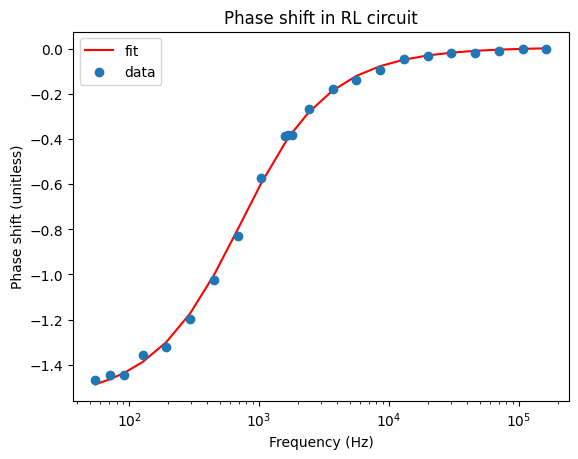

In [ ]:
plt.plot(RL_f, fitc(RL_f, poptc[0], poptc[1]), label = 'fit', c = 'r', zorder = -1)
#plt.plot(RL_f, fitc(RL_f, poptm[0]), label = 'fit')
#plt.plot(a, fitc_phase, label = 'fit')
plt.scatter(RL_f, RL_shift, label = 'data')
plt.xscale('log')
plt.title('Phase shift in RL circuit')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Phase shift (unitless)')
plt.legend()
plt.savefig('task2c.png')

#Task b

In [ ]:
def fitb(f, R, k):
  return np.arctan(-1/(2*np.pi*f*R*C)) + k*np.pi

In [ ]:
def tanb(f,R):
  return np.tan(-1/(2*np.pi*f*R*C))

In [ ]:
poptb, pcovb = curve_fit(tanb, RC_f, np.tan(RC_shift), p0 = [100])
poptb, np.sqrt(pcovb[0][0])

(array([97.80501052]), 1.4680251614304523)

In [ ]:
poptb2, pcovb2 = curve_fit(fitb, RC_f, RC_shift, p0 = [100, 0.5])
poptb2, np.sqrt(pcovb2[0][0])

(array([20.26727518,  0.48185421]), 1.490492263041905)

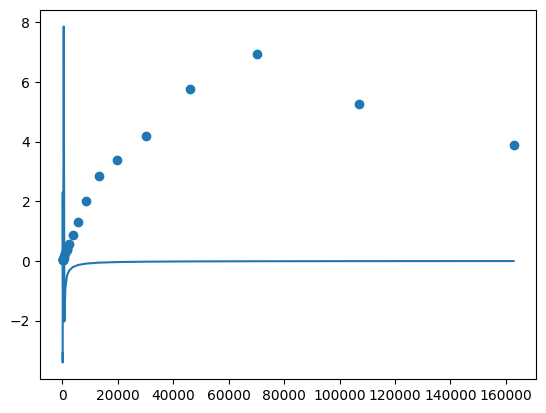

In [ ]:
plt.scatter(RC_f,np.tan(RC_shift))
plt.plot(RC_f,tanb(RC_f,poptb[0]))

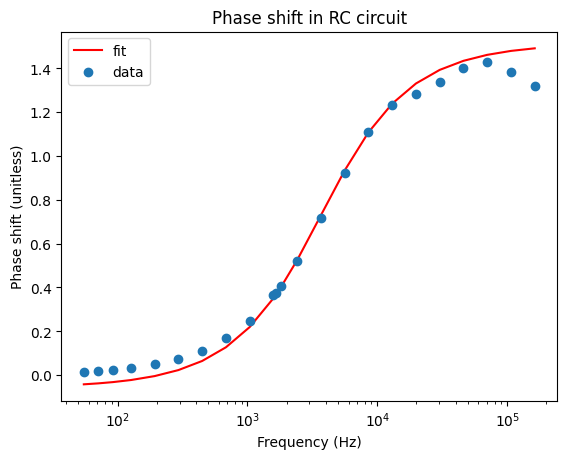

In [ ]:
plt.plot(RC_f, fitb(RC_f, poptb2[0], poptb2[1]), label = 'fit', c = 'r', zorder = -1)
plt.xscale('log')
plt.scatter(RC_f, RC_shift, label = 'data')
plt.ylabel('Phase shift (unitless)')
plt.xlabel('Frequency (Hz)')
plt.title('Phase shift in RC circuit')
plt.legend()
plt.savefig('task2b.png')